In [34]:
# Install necessary packages
!pip install pandas
!pip install matplotlib
!pip install seaborn



In [249]:
# Import necessary functions and packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV




In [63]:
# Set pandas options to display all columns, set display width to 200 characters,
# and format float numbers to 2 decimal places
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', '{:.2f}'.format)

# Specify the file path for the CSV file
file_path = 'main_table.csv'

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)


In [64]:
# Display data
data

,year,age_total,0_15,16_30,31_45,46_60,60+,Not_Specified_age,indian_Jan,indian_Feb,indian_Mar,indian_Apr,indian_May,indian_Jun,indian_July,indian_Aug,indian_Sep,indian_Oct,indian_Nov,indian_Dec,indian_Total,Holiday_Pleasure,Trekking_Mountaineering,Business,Pilgrimage,Official,Conv_Conf,Others_purpose,Not_Specified_purpose,purpose_Total,Male,Female,sex_Total,Third_Country,Indian,total_tourist_Total,total_tourist_modeoftrans,Annual_Growth_rate,Number_air,Percent_air,Number_land,Percent_land,avg_length_of_stay,tourist_Jan,tourist_Feb,tourist_Mar,tourist_Apr,tourist_May,tourist_Jun,tourist_Jul,tourist_Aug,tourist_Sep,tourist_Oct,tourist_Nov,tourist_Dec,monthly_tourist_Total,Australia,Bangladesh,Canada,China,France,Germany,India,Italy,Japan,South Korea,Malaysia,Myanmar,Netherlands,Spain,Sri Lanka,Thailand,U.S.A.,U.K.,Others_nationality,Total_nationality
0,1995,363395,22878,106603,120212,76647,37055,NaN,6449,8758,8838,10575,15352,16380,9839,7475,8225,8447,7605,9317,117260,183207.00,84787.00,21829.00,5257.00,20090.00,5272.00,42953.00,NaN,363395.00,224769,138626,363395,246135,117260,363395,363395,11,325035,89,38360,11,11,22207,28240,34219,33994,27843,25650,23980,27686,30569,46845,35782,26380,363395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1996,393613,22185,94924,116307,89751,70446,NaN,10208,6047,7598,10873,15686,16972,8960,7247,8980,9175,8429,12337,122512,209377.00,88945.00,25079.00,4802.00,20191.00,6054.00,39165.00,NaN,393613.00,233055,160558,393613,271101,122512,393613,393613,8,343246,87,50367,13,14,27886,29676,39336,36331,29728,26749,22684,29080,32181,47314,37650,34998,393613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997,421857,23840,121286,126828,107111,42792,NaN,8729,8710,9788,10886,18620,16394,10067,10777,7637,10162,9461,12207,133438,249360.00,91525.00,27409.00,4068.00,24106.00,5824.00,19565.00,NaN,421857.00,251358,170499,421857,288419,133438,421857,421857,7,371145,88,50712,12,10,25585,32861,43177,35229,33456,26367,26091,35549,31981,56272,40173,35116,421857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1998,463684,26763,122103,151846,121190,41782,NaN,8698,10101,8241,12090,20167,17986,12171,9787,10423,12700,8816,12049,143229,261347.00,112644.00,24954.00,16164.00,22123.00,5181.00,21271.00,NaN,463684.00,267871,195813,463684,320455,143229,463684,463684,10,398008,86,65676,14,11,28822,37956,41338,41087,35814,29181,27895,36174,39664,62487,47403,35863,463684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1999,491504,30967,150307,155985,113314,40913,NaN,9198,8875,8060,11137,20407,18318,10411,9047,10467,12444,10030,12267,140661,290862.00,107960.00,23813.00,19198.00,24132.00,5965.00,19574.00,NaN,491504.00,286161,205343,491504,350843,140661,491504,491504,6,421243,86,70261,14,12,29752,38134,46218,40774,42712,31049,27193,38449,44117,66543,48865,37698,491504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,463646,19136,119816,148063,125140,51491,NaN,4215,5020,5985,7205,9705,14897,7638,7465,8880,8095,7675,9135,95915,255889.00,118780.00,29454.00,15801.00,20832.00,5599.00,17291.00,NaN,463646.00,266937,196709,463646,367731,95915,463646,463646,-6,376914,81,86732,19,12,25307,38959,44944,43635,28363,26933,24480,34670,43523,59195,52993,40644,463646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2001,361237,14608,95801,115678,93621,41529,NaN,5296,5917,6025,6872,10939,4101,4364,3664,5038,4047,4487,3570,64320,187022.00,100828.00,18528.00,13816.00,18727.00,0.00,22316.00,NaN,361237.00,213465,147772,361237,296917,64320,361237,361237,-22,299514,83,61723,17,12,30454,38680,46709,39083,28345,13030,18329,25322,31170,41245,30282,18588,361237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2002,275468,12425,67774,99622,67017,28630,NaN,3996,3708,3713,4376,8136,8880,6659,5578,4984,5021,4679,7047,66777,110143.00

In [65]:
# Show all the column names with their respective indices 
for index, column in enumerate(data.columns):
    print(f"Index: {index}, Column Name: {column}")

Index: 0, Column Name: year
Index: 1, Column Name: age_total
Index: 2, Column Name: 0_15
Index: 3, Column Name: 16_30
Index: 4, Column Name: 31_45
Index: 5, Column Name: 46_60
Index: 6, Column Name: 60+
Index: 7, Column Name: Not_Specified_age
Index: 8, Column Name: indian_Jan
Index: 9, Column Name: indian_Feb
Index: 10, Column Name: indian_Mar
Index: 11, Column Name: indian_Apr
Index: 12, Column Name: indian_May
Index: 13, Column Name: indian_Jun
Index: 14, Column Name: indian_July
Index: 15, Column Name: indian_Aug
Index: 16, Column Name: indian_Sep
Index: 17, Column Name: indian_Oct
Index: 18, Column Name: indian_Nov
Index: 19, Column Name: indian_Dec
Index: 20, Column Name: indian_Total
Index: 21, Column Name: Holiday_Pleasure
Index: 22, Column Name: Trekking_Mountaineering
Index: 23, Column Name: Business
Index: 24, Column Name: Pilgrimage
Index: 25, Column Name: Official
Index: 26, Column Name: Conv_Conf
Index: 27, Column Name: Others_purpose
Index: 28, Column Name: Not_Specified

In [215]:

columns_to_drop = list(data.columns[56:76]) + [data.columns[7], data.columns[28]] + [data.columns [1]] + list(data.columns[8:21])+ list (data.columns[25:27])+[data.columns[23]]

# Drop the columns
# Dropped columns with missing values 

df = data.drop(columns=columns_to_drop)

display(df)

,year,0_15,16_30,31_45,46_60,60+,Holiday_Pleasure,Trekking_Mountaineering,Pilgrimage,Others_purpose,purpose_Total,Male,Female,sex_Total,Third_Country,Indian,total_tourist_Total,total_tourist_modeoftrans,Annual_Growth_rate,Number_air,Percent_air,Number_land,Percent_land,avg_length_of_stay,tourist_Jan,tourist_Feb,tourist_Mar,tourist_Apr,tourist_May,tourist_Jun,tourist_Jul,tourist_Aug,tourist_Sep,tourist_Oct,tourist_Nov,tourist_Dec,monthly_tourist_Total
0,1995,22878,106603,120212,76647,37055,183207.00,84787.00,5257.00,42953.00,363395.00,224769,138626,363395,246135,117260,363395,363395,11,325035,89,38360,11,11,22207,28240,34219,33994,27843,25650,23980,27686,30569,46845,35782,26380,363395
1,1996,22185,94924,116307,89751,70446,209377.00,88945.00,4802.00,39165.00,393613.00,233055,160558,393613,271101,122512,393613,393613,8,343246,87,50367,13,14,27886,29676,39336,36331,29728,26749,22684,29080,32181,47314,37650,34998,393613
2,1997,23840,121286,126828,107111,42792,249360.00,91525.00,4068.00,19565.00,421857.00,251358,170499,421857,288419,133438,421857,421857,7,371145,88,50712,12,10,25585,32861,43177,35229,33456,26367,26091,35549,31981,56272,40173,35116,421857
3,1998,26763,122103,151846,121190,41782,261347.00,112644.00,16164.00,21271.00,463684.00,267871,195813,463684,320455,143229,463684,463684,10,398008,86,65676,14,11,28822,37956,41338,41087,35814,29181,27895,36174,39664,62487,47403,35863,463684
4,1999,30967,150307,155985,113314,40913,290862.00,107960.00,19198.00,19574.00,491504.00,286161,205343,491504,350843,140661,491504,491504,6,421243,86,70261,14,12,29752,38134,46218,40774,42712,31049,27193,38449,44117,66543,48865,37698,491504
5,2000,19136,119816,148063,125140,51491,255889.00,118780.00,15801.00,17291.00,463646.00,266937,196709,463646,367731,95915,463646,463646,-6,376914,81,86732,19,12,25307,38959,44944,43635,28363,26933,24480,34670,43523,59195,52993,40644,463646
6,2001,14608,95801,115678,93621,41529,187022.00,100828.00,13816.00,22316.00,361237.00,213465,147772,361237,296917,64320,361237,361237,-22,299514,83,61723,17,12,30454,38680,46709,39083,28345,13030,18329,25322,31170,41245,30282,18588,361237
7,2002,12425,67774,99622,67017,28630,110143.00,59279.00,12366.00,58907.00,275468.00,174710,100758,275468,208691,66777,275468,275468,-24,218660,79,56808,21,8,17176,20668,28815,21253,19887,17218,16621,21093,23752,35272,28723,24990,275468
8,2003,16056,78357,99740,85753,58226,97904.00,65721.00,21395.00,111758.00,338132.00,204732,133400,338132,251769,86363,338132,338132,23,275438,82,62694,18,10,21215,24349,27737,25851,22704,20351,22661,27568,28724,45459,38398,33115,338132
9,2004,38734,84125,128267,96920,37251,167262.00,69442.00,45664.00,71893.00,385297.00,255303,129994,385297,294971,90326,385297,385297,14,297335,77,87962,23,14,30988,35631,44290,33514,26802,19793,24860,33162,25496,43373,36381,31007,385297


In [122]:
# Get info of the data frame
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       28 non-null     int64  
 1   0_15                       28 non-null     int64  
 2   16_30                      28 non-null     int64  
 3   31_45                      28 non-null     int64  
 4   46_60                      28 non-null     int64  
 5   60+                        28 non-null     int64  
 6   Holiday_Pleasure           27 non-null     float64
 7   Trekking_Mountaineering    27 non-null     float64
 8   Business                   21 non-null     float64
 9   Pilgrimage                 27 non-null     float64
 10  Official                   21 non-null     float64
 11  Conv_Conf                  21 non-null     float64
 12  Others_purpose             27 non-null     float64
 13  purpose_Total              27 non-null     float64
 

In [123]:
# Generate descriptive statistics of the DataFrame
df.describe()

,year,0_15,16_30,31_45,46_60,60+,Holiday_Pleasure,Trekking_Mountaineering,Business,Pilgrimage,Official,Conv_Conf,Others_purpose,purpose_Total,Male,Female,sex_Total,Third_Country,Indian,total_tourist_Total,total_tourist_modeoftrans,Annual_Growth_rate,Number_air,Percent_air,Number_land,Percent_land,avg_length_of_stay,tourist_Jan,tourist_Feb,tourist_Mar,tourist_Apr,tourist_May,tourist_Jun,tourist_Jul,tourist_Aug,tourist_Sep,tourist_Oct,tourist_Nov,tourist_Dec,monthly_tourist_Total
count,28.00,28.00,28.00,28.00,28.00,28.00,27.00,27.00,21.00,27.00,21.00,21.00,27.00,27.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00
mean,2008.50,33380.57,128509.71,171992.32,139148.75,73227.43,304508.81,89037.70,22703.00,55098.44,24299.38,6865.19,55692.41,563221.26,314782.04,241725.07,556513.29,435039.29,121474.00,556513.29,556513.29,12.82,443129.14,80.32,113384.14,19.68,12.11,37975.89,47479.57,58181.46,48074.32,36237.61,32584.11,32597.96,44384.68,45360.71,67672.39,58476.14,47488.43,556513.29
std,8.23,16723.50,58783.10,78489.34,67682.40,42572.67,186421.26,41966.79,4004.37,49415.66,6881.61,4956.19,28121.08,262493.98,131173.27,130924.09,260021.22,221254.15,48877.45,260021.22,260021.22,62.58,209005.01,7.30,64970.56,7.30,1.73,19371.98,24685.13,28751.95,25141.40,18560.43,17882.86,17052.96,22713.81,21793.66,30281.41,31102.02,25250.07,260021.22
min,1995.00,9768.00,30713.00,64164.00,35351.00,9036.00,97904.00,9162.00,13948.00,4068.00,17088.00,0.00,17291.00,150962.00,105410.00,45552.00,150962.00,86290.00,40336.00,150962.00,150962.00,-81.00,150625.00,68.00,337.00,0.00,8.00,8874.00,9266.00,15254.00,14.00,31.00,102.00,196.00,267.00,584.00,2025.00,1956.00,4242.00,150962.00
25%,2001.75,21542.25,92224.25,119235.75,94850.25,41718.75,157721.00,66710.50,20876.00,15398.50,20191.00,5181.00,31885.50,384611.50,230983.50,145485.50,381794.00,286055.25,90964.25,381794.00,381794.00,-3.50,298969.25,74.00,60494.25,16.25,11.00,25558.00,29317.00,40837.50,33874.00,26486.75,22043.75,23726.75,32132.50,31778.25,47196.75,38211.00,34527.25,381794.00
50%,2008.50,31881.00,120745.50,151008.50,121288.50,62562.00,255889.00,88945.00,23039.00,45091.00,21967.00,6054.00,53728.00,500277.00,286572.00,209318.50,495890.50,386633.00,117754.50,495890.50,495890.50,6.50,378118.00,79.50,99079.50,20.50,12.00,30721.00,39446.50,46463.50,41014.50,31476.00,28057.00,26642.00,38527.50,42196.50,64454.00,52336.00,39742.00,495890.50
75%,2015.25,41512.25,158990.25,213751.75,179382.75,88711.00,396834.50,104918.50,24785.00,80988.00,24518.00,9985.00,74484.00,744608.50,370981.00,345507.75,740411.75,594193.75,144797.75,740411.75,740411.75,19.00,575917.50,83.75,179840.50,26.00,13.00,43928.00,62230.50,77129.75,62479.75,47591.50,46325.50,43111.25,61406.00,59493.75,86929.75,73613.75,60344.25,740411.75
max,2022.00,84891.00,269648.00,383155.00,305651.00,176872.00,778173.00,197786.00,30309.00,171937.00,43044.00,15952.00,112357.00,1197191.00,634392.00,562799.00,1197191.00,978749.00,254150.00,1197191.00,1197191.00,307.00,995884.00,100.00,204834.00,32.00,16.00,81273.00,102423.00,127351.00,109399.00,78329.00,74883.00,73281.00,94749.00,92604.00,134096.00,147859.00,121620.00,1197191.00


In [216]:

# Check for missing values
print(df.isnull().sum())


year                         0
0_15                         0
16_30                        0
31_45                        0
46_60                        0
60+                          0
Holiday_Pleasure             1
Trekking_Mountaineering      1
Pilgrimage                   1
Others_purpose               1
purpose_Total                1
Male                         0
Female                       0
sex_Total                    0
Third_Country                0
Indian                       0
total_tourist_Total          0
total_tourist_modeoftrans    0
Annual_Growth_rate           0
Number_air                   0
Percent_air                  0
Number_land                  0
Percent_land                 0
avg_length_of_stay           0
tourist_Jan                  0
tourist_Feb                  0
tourist_Mar                  0
tourist_Apr                  0
tourist_May                  0
tourist_Jun                  0
tourist_Jul                  0
tourist_Aug                  0
tourist_

Purpose is not our main metric of prediction of the missing values are fine. But will still impute for the sake fo visualization


In [218]:
# Imputing the columns with only one na value
# Function to impute missing values with the average of surrounding values
def impute_missing_values(df):
    for column in df.columns:
        if df[column].isnull().sum() > 0:
            df[column] = df[column].interpolate(method='linear', limit_direction='both')
    return df

# Impute the missing values
df= impute_missing_values(df)

# Display the DataFrame with imputed values
display(df)

,year,0_15,16_30,31_45,46_60,60+,Holiday_Pleasure,Trekking_Mountaineering,Pilgrimage,Others_purpose,purpose_Total,Male,Female,sex_Total,Third_Country,Indian,total_tourist_Total,total_tourist_modeoftrans,Annual_Growth_rate,Number_air,Percent_air,Number_land,Percent_land,avg_length_of_stay,tourist_Jan,tourist_Feb,tourist_Mar,tourist_Apr,tourist_May,tourist_Jun,tourist_Jul,tourist_Aug,tourist_Sep,tourist_Oct,tourist_Nov,tourist_Dec,monthly_tourist_Total
0,1995,22878,106603,120212,76647,37055,183207.00,84787.00,5257.00,42953.00,363395.00,224769,138626,363395,246135,117260,363395,363395,11,325035,89,38360,11,11,22207,28240,34219,33994,27843,25650,23980,27686,30569,46845,35782,26380,363395
1,1996,22185,94924,116307,89751,70446,209377.00,88945.00,4802.00,39165.00,393613.00,233055,160558,393613,271101,122512,393613,393613,8,343246,87,50367,13,14,27886,29676,39336,36331,29728,26749,22684,29080,32181,47314,37650,34998,393613
2,1997,23840,121286,126828,107111,42792,249360.00,91525.00,4068.00,19565.00,421857.00,251358,170499,421857,288419,133438,421857,421857,7,371145,88,50712,12,10,25585,32861,43177,35229,33456,26367,26091,35549,31981,56272,40173,35116,421857
3,1998,26763,122103,151846,121190,41782,261347.00,112644.00,16164.00,21271.00,463684.00,267871,195813,463684,320455,143229,463684,463684,10,398008,86,65676,14,11,28822,37956,41338,41087,35814,29181,27895,36174,39664,62487,47403,35863,463684
4,1999,30967,150307,155985,113314,40913,290862.00,107960.00,19198.00,19574.00,491504.00,286161,205343,491504,350843,140661,491504,491504,6,421243,86,70261,14,12,29752,38134,46218,40774,42712,31049,27193,38449,44117,66543,48865,37698,491504
5,2000,19136,119816,148063,125140,51491,255889.00,118780.00,15801.00,17291.00,463646.00,266937,196709,463646,367731,95915,463646,463646,-6,376914,81,86732,19,12,25307,38959,44944,43635,28363,26933,24480,34670,43523,59195,52993,40644,463646
6,2001,14608,95801,115678,93621,41529,187022.00,100828.00,13816.00,22316.00,361237.00,213465,147772,361237,296917,64320,361237,361237,-22,299514,83,61723,17,12,30454,38680,46709,39083,28345,13030,18329,25322,31170,41245,30282,18588,361237
7,2002,12425,67774,99622,67017,28630,110143.00,59279.00,12366.00,58907.00,275468.00,174710,100758,275468,208691,66777,275468,275468,-24,218660,79,56808,21,8,17176,20668,28815,21253,19887,17218,16621,21093,23752,35272,28723,24990,275468
8,2003,16056,78357,99740,85753,58226,97904.00,65721.00,21395.00,111758.00,338132.00,204732,133400,338132,251769,86363,338132,338132,23,275438,82,62694,18,10,21215,24349,27737,25851,22704,20351,22661,27568,28724,45459,38398,33115,338132
9,2004,38734,84125,128267,96920,37251,167262.00,69442.00,45664.00,71893.00,385297.00,255303,129994,385297,294971,90326,385297,385297,14,297335,77,87962,23,14,30988,35631,44290,33514,26802,19793,24860,33162,25496,43373,36381,31007,385297


In [219]:

# Check for missing values in the 'total_tourist_Total' column
df.loc[df['total_tourist_Total'].isna()]


     

,year,0_15,16_30,31_45,46_60,60+,Holiday_Pleasure,Trekking_Mountaineering,Pilgrimage,Others_purpose,purpose_Total,Male,Female,sex_Total,Third_Country,Indian,total_tourist_Total,total_tourist_modeoftrans,Annual_Growth_rate,Number_air,Percent_air,Number_land,Percent_land,avg_length_of_stay,tourist_Jan,tourist_Feb,tourist_Mar,tourist_Apr,tourist_May,tourist_Jun,tourist_Jul,tourist_Aug,tourist_Sep,tourist_Oct,tourist_Nov,tourist_Dec,monthly_tourist_Total


no missing values for our main metric of prediction

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


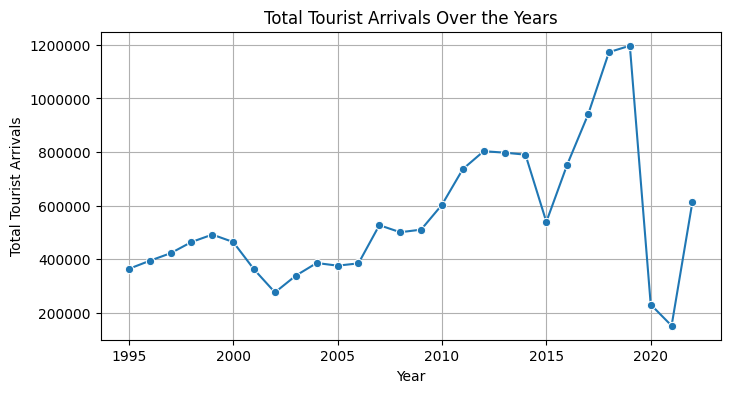

In [220]:
# Exploratory Data Analysis 

# Plotting annual trends
plt.figure(figsize=(8, 4))
sns.lineplot(x='year', y='total_tourist_Total', data=df, marker='o')
plt.title('Total Tourist Arrivals Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Tourist Arrivals')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


2019-2020 is an outlier because of covid-19 so i will replace the covid data with mean of the surrounding years

In [221]:
# Calculate the mean value excluding the year 2020
mean_value = df[(df['year'] != 2020)]['total_tourist_Total'].mean()

# Create a copy of the original DataFrame to avoid modifying it directly
df_modified = df.copy()

# Replace the outlier value in the new DataFrame
df_modified.loc[df_modified['year'] == 2020, 'total_tourist_Total'] = mean_value

display(df_modified)

/var/folders/bn/jb9d_92519s65p9w6cc5_spxfp5d5n/T/ipykernel_21356/3040522339.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '568603.2222222222' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_modified.loc[df_modified['year'] == 2020, 'total_tourist_Total'] = mean_value


,year,0_15,16_30,31_45,46_60,60+,Holiday_Pleasure,Trekking_Mountaineering,Pilgrimage,Others_purpose,purpose_Total,Male,Female,sex_Total,Third_Country,Indian,total_tourist_Total,total_tourist_modeoftrans,Annual_Growth_rate,Number_air,Percent_air,Number_land,Percent_land,avg_length_of_stay,tourist_Jan,tourist_Feb,tourist_Mar,tourist_Apr,tourist_May,tourist_Jun,tourist_Jul,tourist_Aug,tourist_Sep,tourist_Oct,tourist_Nov,tourist_Dec,monthly_tourist_Total
0,1995,22878,106603,120212,76647,37055,183207.00,84787.00,5257.00,42953.00,363395.00,224769,138626,363395,246135,117260,363395.00,363395,11,325035,89,38360,11,11,22207,28240,34219,33994,27843,25650,23980,27686,30569,46845,35782,26380,363395
1,1996,22185,94924,116307,89751,70446,209377.00,88945.00,4802.00,39165.00,393613.00,233055,160558,393613,271101,122512,393613.00,393613,8,343246,87,50367,13,14,27886,29676,39336,36331,29728,26749,22684,29080,32181,47314,37650,34998,393613
2,1997,23840,121286,126828,107111,42792,249360.00,91525.00,4068.00,19565.00,421857.00,251358,170499,421857,288419,133438,421857.00,421857,7,371145,88,50712,12,10,25585,32861,43177,35229,33456,26367,26091,35549,31981,56272,40173,35116,421857
3,1998,26763,122103,151846,121190,41782,261347.00,112644.00,16164.00,21271.00,463684.00,267871,195813,463684,320455,143229,463684.00,463684,10,398008,86,65676,14,11,28822,37956,41338,41087,35814,29181,27895,36174,39664,62487,47403,35863,463684
4,1999,30967,150307,155985,113314,40913,290862.00,107960.00,19198.00,19574.00,491504.00,286161,205343,491504,350843,140661,491504.00,491504,6,421243,86,70261,14,12,29752,38134,46218,40774,42712,31049,27193,38449,44117,66543,48865,37698,491504
5,2000,19136,119816,148063,125140,51491,255889.00,118780.00,15801.00,17291.00,463646.00,266937,196709,463646,367731,95915,463646.00,463646,-6,376914,81,86732,19,12,25307,38959,44944,43635,28363,26933,24480,34670,43523,59195,52993,40644,463646
6,2001,14608,95801,115678,93621,41529,187022.00,100828.00,13816.00,22316.00,361237.00,213465,147772,361237,296917,64320,361237.00,361237,-22,299514,83,61723,17,12,30454,38680,46709,39083,28345,13030,18329,25322,31170,41245,30282,18588,361237
7,2002,12425,67774,99622,67017,28630,110143.00,59279.00,12366.00,58907.00,275468.00,174710,100758,275468,208691,66777,275468.00,275468,-24,218660,79,56808,21,8,17176,20668,28815,21253,19887,17218,16621,21093,23752,35272,28723,24990,275468
8,2003,16056,78357,99740,85753,58226,97904.00,65721.00,21395.00,111758.00,338132.00,204732,133400,338132,251769,86363,338132.00,338132,23,275438,82,62694,18,10,21215,24349,27737,25851,22704,20351,22661,27568,28724,45459,38398,33115,338132
9,2004,38734,84125,128267,96920,37251,167262.00,69442.00,45664.00,71893.00,385297.00,255303,129994,385297,294971,90326,385297.00,385297,14,297335,77,87962,23,14,30988,35631,44290,33514,26802,19793,24860,33162,25496,43373,36381,31007,385297


In [222]:
# Create a new DataFrame with the 'year' and 'total_tourist_Total' columns from both df and df_modified
comparison_df = pd.DataFrame({
    'year': df['year'],
    'total_tourist_Total_original': df['total_tourist_Total'],
    'total_tourist_Total_modified': df_modified['total_tourist_Total']
})

# Display the comparison DataFrame
comparison_df


,year,total_tourist_Total_original,total_tourist_Total_modified
0,1995,363395,363395.00
1,1996,393613,393613.00
2,1997,421857,421857.00
3,1998,463684,463684.00
4,1999,491504,491504.00
5,2000,463646,463646.00
6,2001,361237,361237.00
7,2002,275468,275468.00
8,2003,338132,338132.00
9,2004,385297,385297.00


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


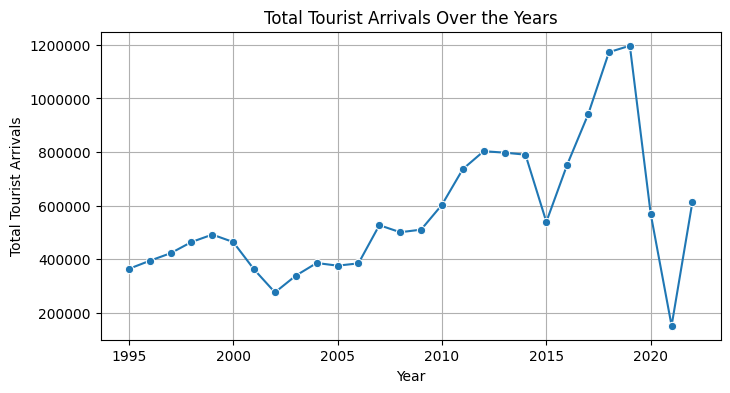

In [223]:
# Plotting annual trends for modified data
plt.figure(figsize=(8, 4))
sns.lineplot(x='year', y='total_tourist_Total', data=df_modified, marker='o')
plt.title('Total Tourist Arrivals Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Tourist Arrivals')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

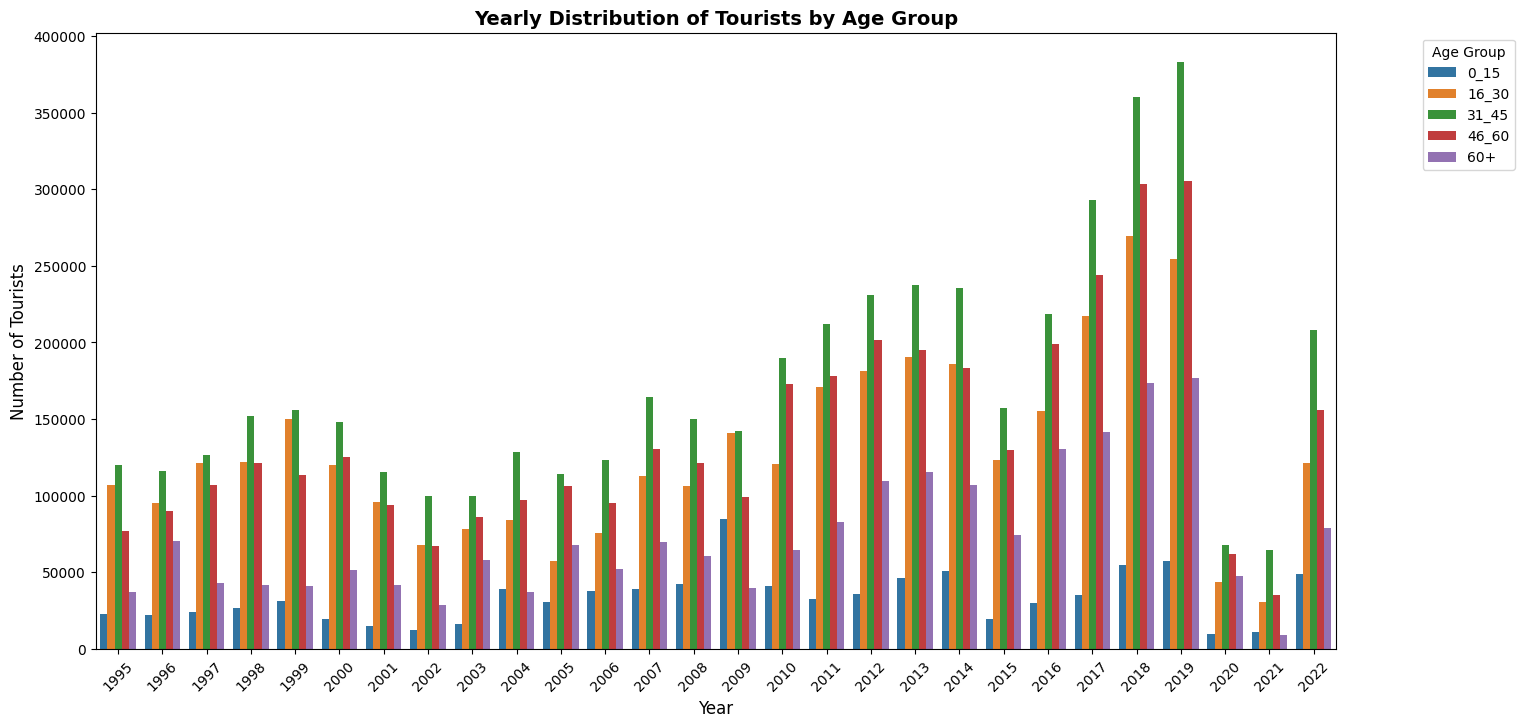

In [224]:
# List of age group columns
age_columns = ['0_15', '16_30', '31_45', '46_60', '60+']

# Reshape the DataFrame to long format
age_df = df.melt(id_vars=['year'], value_vars=age_columns, var_name='Age Group', value_name='Number of Tourists')

# Create the bar plot
plt.figure(figsize=(16, 8))
sns.barplot(x='year', y='Number of Tourists', hue='Age Group', data=age_df)
plt.title('Yearly Distribution of Tourists by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Tourists', fontsize=12)
plt.legend(title='Age Group', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

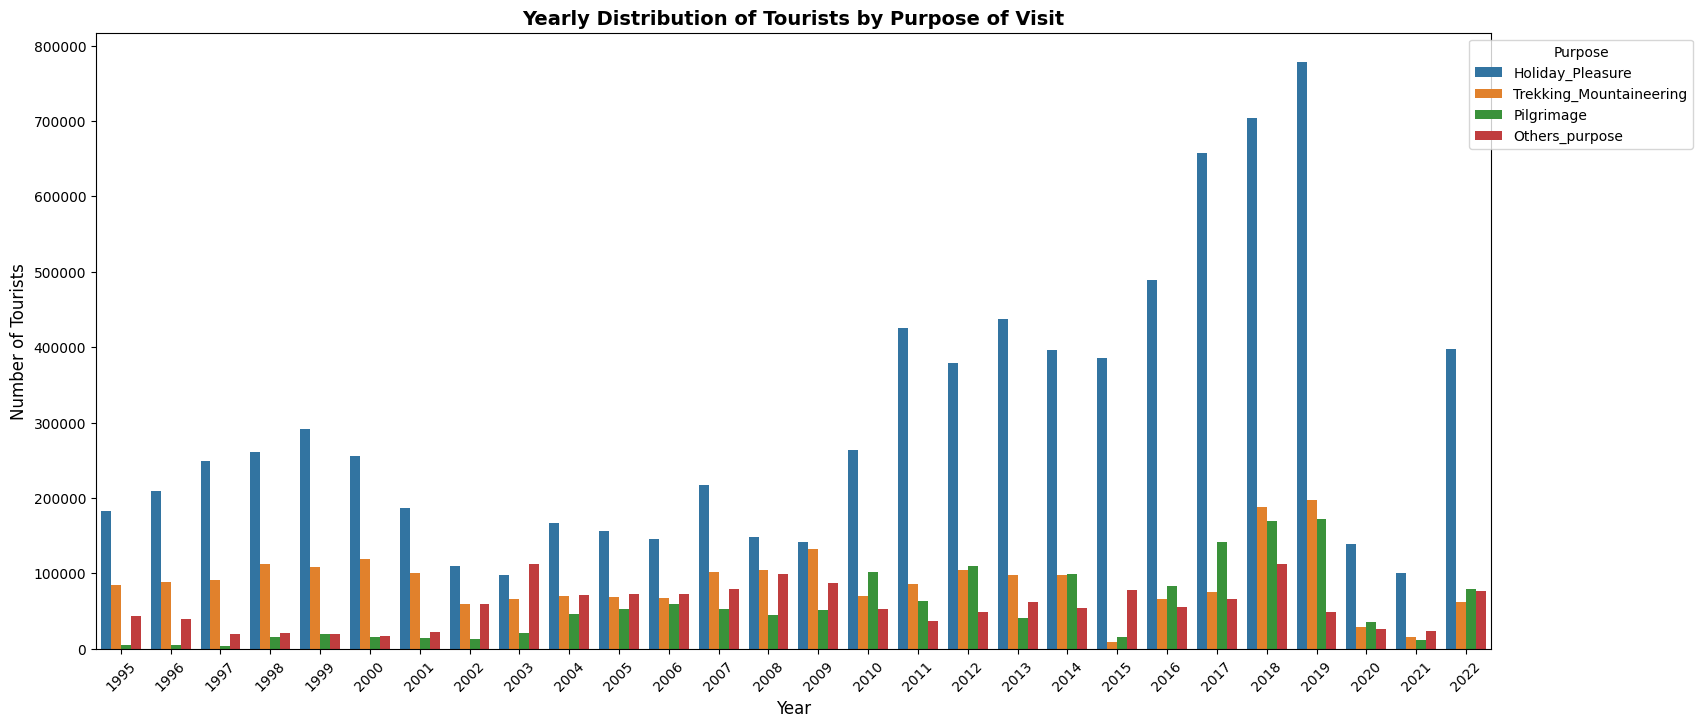

In [226]:



# List of purpose columns
purpose_columns = ['Holiday_Pleasure', 'Trekking_Mountaineering', 'Pilgrimage', 'Others_purpose']

# Reshape the DataFrame to long format
purpose_df = df.melt(id_vars=['year'], value_vars=purpose_columns, var_name='Purpose', value_name='Number of Tourists')

# Create the bar plot
plt.figure(figsize=(18, 8))
sns.barplot(x='year', y='Number of Tourists', hue='Purpose', data=purpose_df)
plt.title('Yearly Distribution of Tourists by Purpose of Visit', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Tourists', fontsize=12)
plt.legend(title='Purpose', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



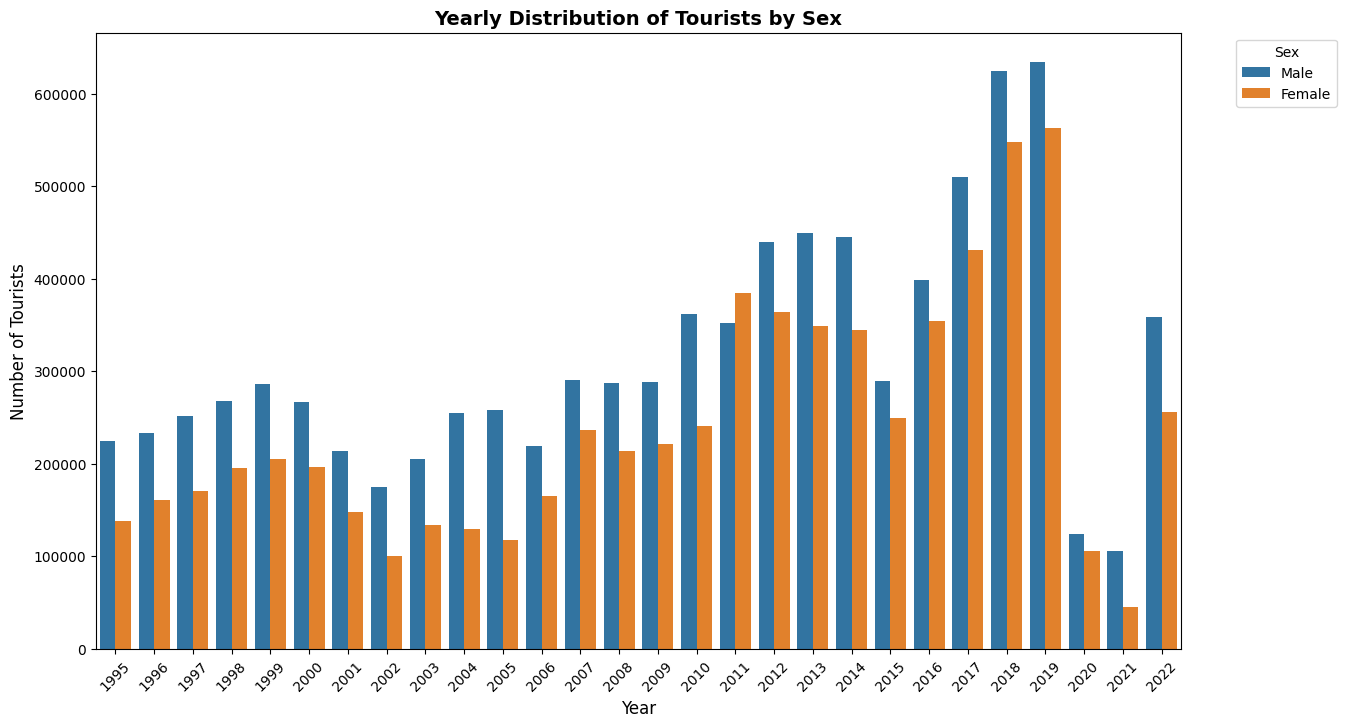

In [227]:

# Sex distribution
# List of sex columns
sex_columns = ['Male', 'Female']

# Sum of tourists by sex for each year
sex_df = df.groupby('year')[sex_columns].sum().reset_index()

# Melt the DataFrame to long format for seaborn plotting
sex_long_df = sex_df.melt(id_vars='year', value_vars=sex_columns, var_name='Sex', value_name='Number of Tourists')

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='year', y='Number of Tourists', hue='Sex', data=sex_long_df)
plt.title('Yearly Distribution of Tourists by Sex', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Tourists', fontsize=12)
plt.legend(title='Sex', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=45)
plt.show()


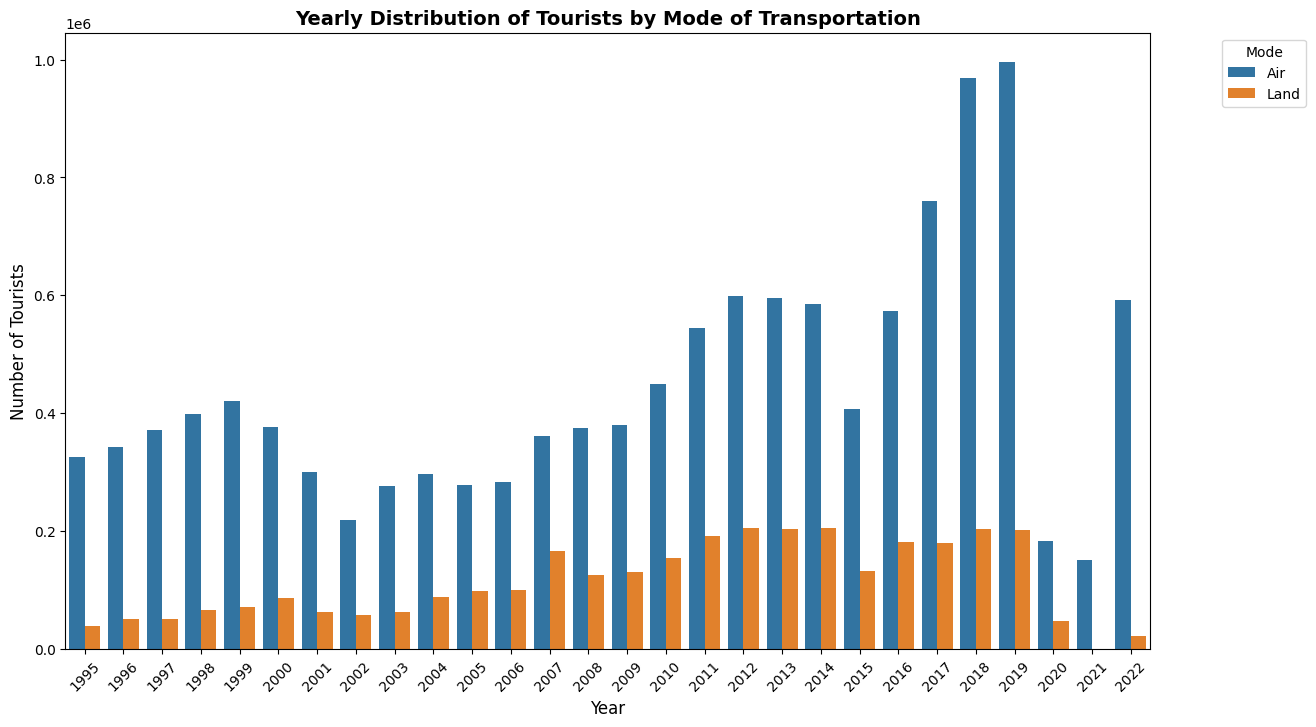

In [228]:
# List of transportation columns
transport_columns = ['Number_air', 'Number_land']

# Sum of tourists by mode of transportation for each year
transport_df = df.groupby('year')[transport_columns].sum().reset_index()

# Melt the DataFrame to long format for seaborn plotting
transport_long_df = transport_df.melt(id_vars='year', value_vars=transport_columns, var_name='Mode', value_name='Number of Tourists')

# Map the column names to readable format
transport_map = {
    'Number_air': 'Air',
    'Number_land': 'Land'
}
transport_long_df['Mode'] = transport_long_df['Mode'].map(transport_map)

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='year', y='Number of Tourists', hue='Mode', data=transport_long_df)
plt.title('Yearly Distribution of Tourists by Mode of Transportation', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Tourists', fontsize=12)
plt.legend(title='Mode', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=45)
plt.show()

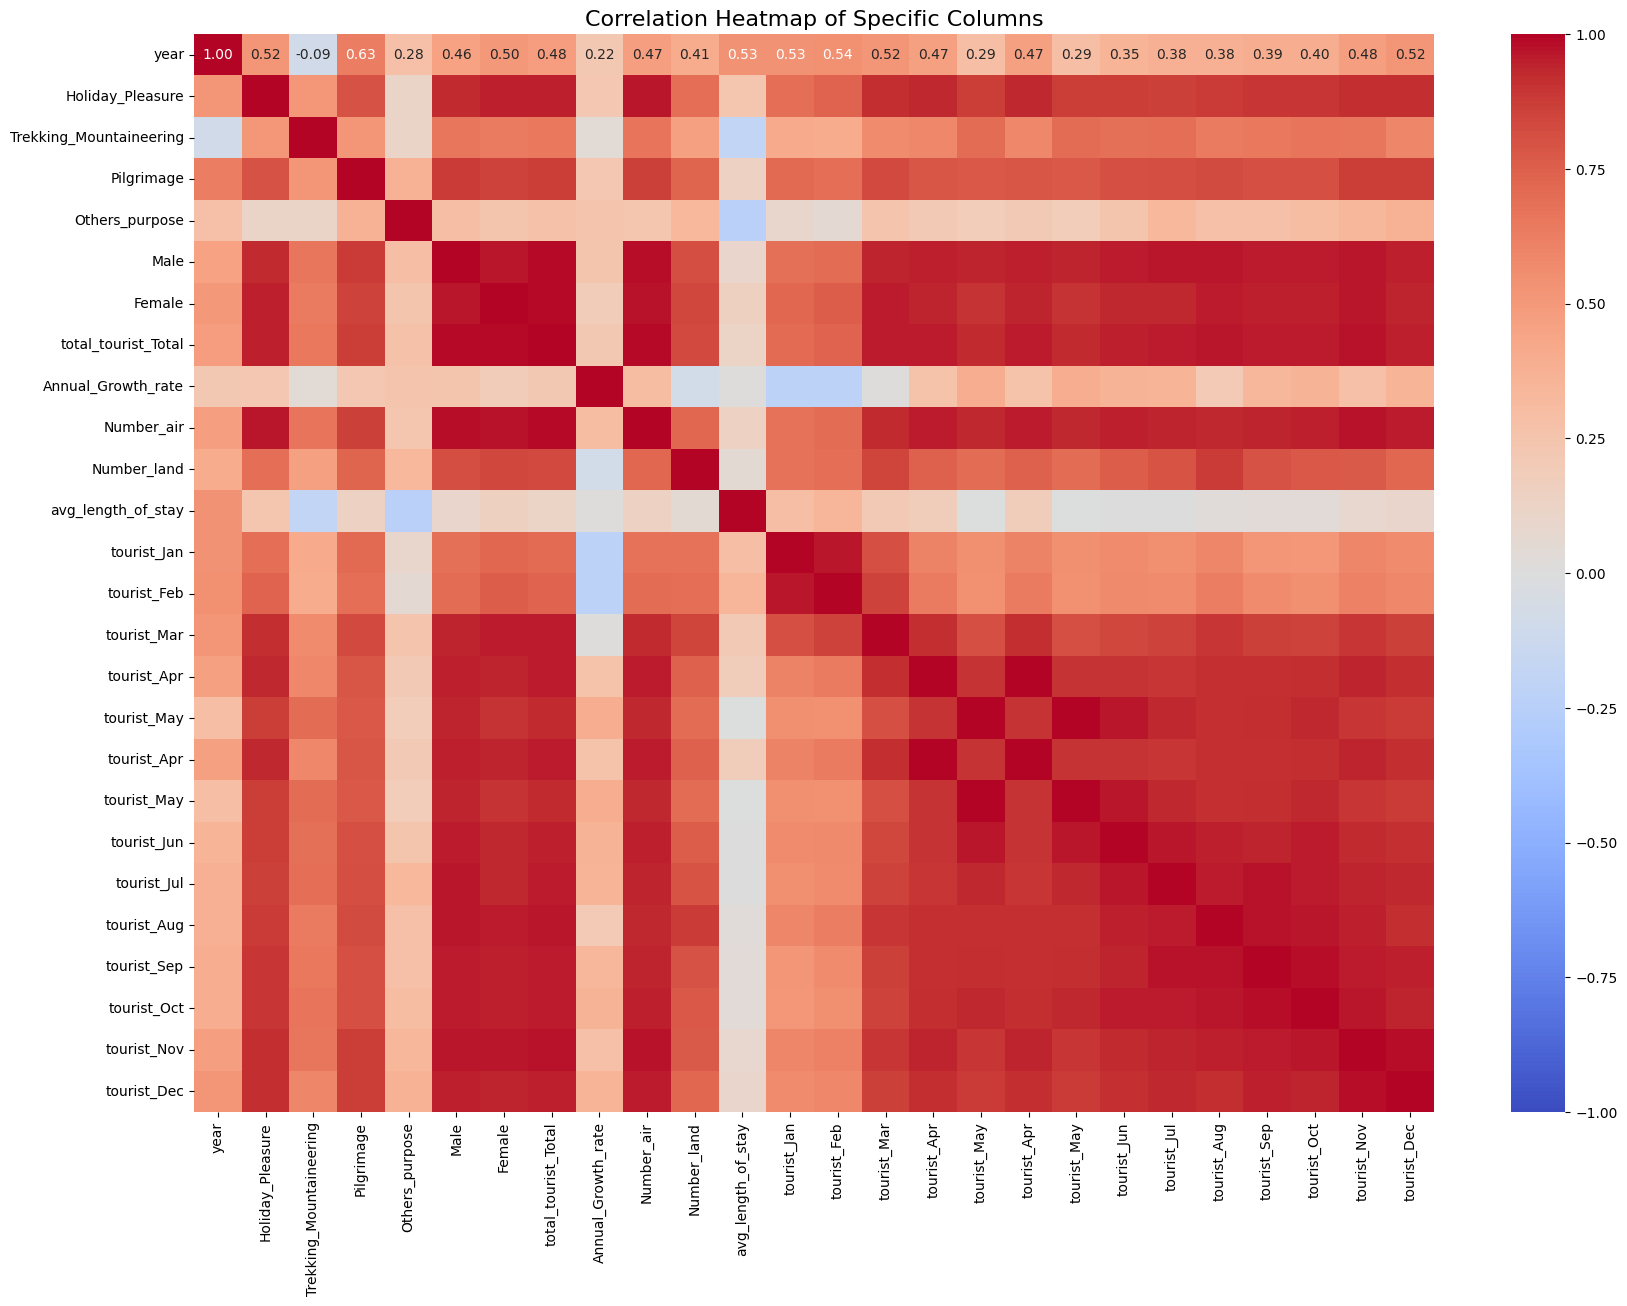

In [230]:
#Are any variables correlated?

# Define the specific columns you want to include in the heatmap
specific_columns = [
    'year', 'Holiday_Pleasure', 'Trekking_Mountaineering', 'Pilgrimage', 'Others_purpose', 'Male', 'Female', 'total_tourist_Total', 'Annual_Growth_rate', 
    'Number_air', 'Number_land', 'avg_length_of_stay', 'tourist_Jan', 'tourist_Feb', 'tourist_Mar', 'tourist_Apr', 'tourist_May', 'tourist_Apr', 'tourist_May',
    'tourist_Jun', 'tourist_Jul', 'tourist_Aug', 'tourist_Sep', 'tourist_Oct', 'tourist_Nov', 'tourist_Dec'

]

# Select only the specific columns
df_specific = df[specific_columns]

# Calculate the correlation matrix for the specific columns
corr_matrix = df_specific.corr()

# Create the heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Specific Columns', fontsize=16)
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


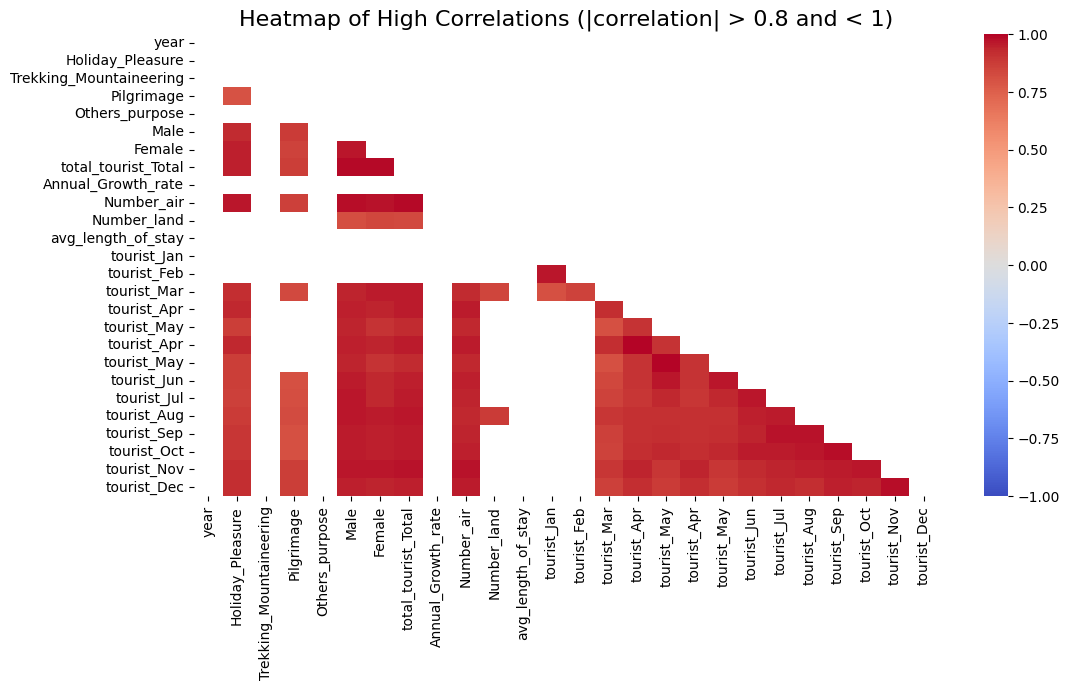

In [231]:
threshold = 0.8
# Filter the correlation matrix for values above the threshold but less than 1
high_corr_matrix = corr_matrix[(corr_matrix > threshold) | (corr_matrix < -threshold)]

#Create a mask to exclude self-correlations
mask = np.zeros_like(high_corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Apply the mask
high_corr_matrix = high_corr_matrix.mask(mask)

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(high_corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', vmin=-1, vmax=1)
plt.title('Heatmap of High Correlations (|correlation| > 0.8 and < 1)', fontsize=16)
plt.show()



From the heatmap, we can make the follwoing inference:

1. High Correlation Clusters: There are several clusters of highly correlated features. For example, the months (tourist_Jan, tourist_Feb, tourist_Mar, etc.) show strong correlations with each other. This makes sense because the number of tourists in consecutive months is likely to be correlated due to seasonal trends.

2. Total Tourists and Mode of Transport: The total_tourist_Total seems to have a high correlation with Number_air and Number_land, which is expected as the total number of tourists would naturally include those arriving by air and land.

3. Tourist Purpose and Gender: Features such as Holiday_Pleasure, Trekking_Mountaineering, Business, etc., show some correlation with Male and Female. This can provide insights into the preferences of tourists based on gender.

Since some variables are highly correlated, we will be doing some feature engineering to create a new feature


In [232]:

# Define a function to map months to seasons and aggregate
def aggregate_to_seasons(df):
    seasons = {
        'Winter': ['tourist_Dec', 'tourist_Jan', 'tourist_Feb'],
        'Spring': ['tourist_Mar', 'tourist_Apr', 'tourist_May'],
        'Summer': ['tourist_Jun', 'tourist_Jul', 'tourist_Aug'],
        'Autumn': ['tourist_Sep', 'tourist_Oct', 'tourist_Nov']
    }
    
    season_data = pd.DataFrame(index=df.index)
    
    for season, months in seasons.items():
        season_data[f'tourist_{season}'] = df[months].sum(axis=1)
    
    return season_data

# Aggregate the data to seasons
season_df = aggregate_to_seasons(df_specific)

# Check the resulting dataframe
print(season_df)
print(f"Original number of rows: {len(df_specific)}, Aggregated number of rows: {len(season_df)}")


    tourist_Winter  tourist_Spring  tourist_Summer  tourist_Autumn
0            76827          157893           77316          113196
1            92560          171454           78513          117145
2            93562          180547           88007          128426
3           102641          195140           93250          149554
4           105584          213190           96691          159525
5           104910          188940           86083          155711
6            87722          181565           56681          102697
7            62834          111095           54932           87747
8            78679          124847           70580          112581
9            97626          164922           77815          105250
10           83985          127785           83514          129069
11           90506          126579           84543          127151
12          115282          208314          111436          168469
13          122428          196505           89787          16

In [233]:
# Concatenate the original dataframe with the seasonal dataframe
modified_df = pd.concat([df_specific, season_df], axis=1)

# List of monthly columns to drop
monthly_columns = [
    'tourist_Jan', 'tourist_Feb', 'tourist_Mar', 'tourist_Apr', 
    'tourist_May', 'tourist_Jun', 'tourist_Jul', 'tourist_Aug', 
    'tourist_Sep', 'tourist_Oct', 'tourist_Nov', 'tourist_Dec'
]

# Drop the monthly columns from the dataframe
modified_df.drop(columns=monthly_columns, inplace=True)

# Check the resulting dataframe
display(modified_df)
print(f"Original number of rows: {len(df_specific)}, Aggregated number of rows: {len(modified_df)}")



,year,Holiday_Pleasure,Trekking_Mountaineering,Pilgrimage,Others_purpose,Male,Female,total_tourist_Total,Annual_Growth_rate,Number_air,Number_land,avg_length_of_stay,tourist_Winter,tourist_Spring,tourist_Summer,tourist_Autumn
0,1995,183207.00,84787.00,5257.00,42953.00,224769,138626,363395,11,325035,38360,11,76827,157893,77316,113196
1,1996,209377.00,88945.00,4802.00,39165.00,233055,160558,393613,8,343246,50367,14,92560,171454,78513,117145
2,1997,249360.00,91525.00,4068.00,19565.00,251358,170499,421857,7,371145,50712,10,93562,180547,88007,128426
3,1998,261347.00,112644.00,16164.00,21271.00,267871,195813,463684,10,398008,65676,11,102641,195140,93250,149554
4,1999,290862.00,107960.00,19198.00,19574.00,286161,205343,491504,6,421243,70261,12,105584,213190,96691,159525
5,2000,255889.00,118780.00,15801.00,17291.00,266937,196709,463646,-6,376914,86732,12,104910,188940,86083,155711
6,2001,187022.00,100828.00,13816.00,22316.00,213465,147772,361237,-22,299514,61723,12,87722,181565,56681,102697
7,2002,110143.00,59279.00,12366.00,58907.00,174710,100758,275468,-24,218660,56808,8,62834,111095,54932,87747
8,2003,97904.00,65721.00,21395.00,111758.00,204732,133400,338132,23,275438,62694,10,78679,124847,70580,112581
9,2004,167262.00,69442.00,45664.00,71893.00,255303,129994,385297,14,297335,87962,14,97626,164922,77815,105250


Original number of rows: 28, Aggregated number of rows: 28


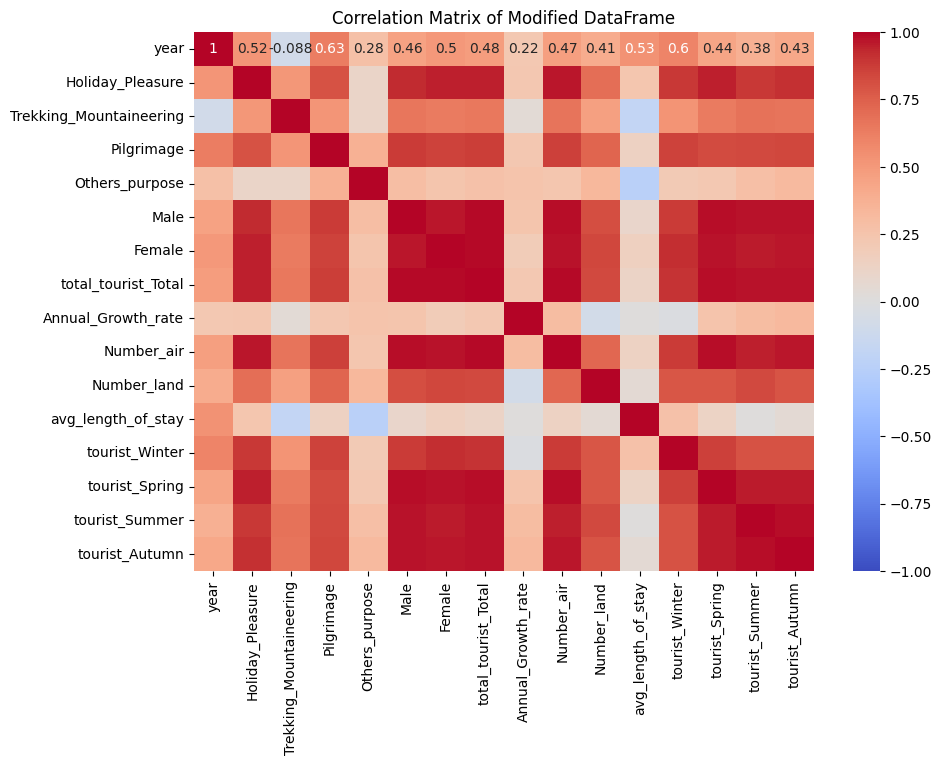

In [234]:


# Calculate the correlation matrix for the modified dataframe
corr_matrix = modified_df.corr()

# Plot the correlation matrix with a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Modified DataFrame')
plt.show()


Based on EDA, I know that I wont need certain columns so I will drop those

In [235]:

# List of columns to drop
columns_to_drop = ['Male', 'Female', 'Number_air', 'Number_land']

# Drop the specified columns from the dataframe
modified_df.drop(columns=columns_to_drop, inplace=True)




In [236]:
 #Check the resulting dataframe
display(modified_df)
print(f"Columns after dropping: {modified_df.columns.tolist()}")

,year,Holiday_Pleasure,Trekking_Mountaineering,Pilgrimage,Others_purpose,total_tourist_Total,Annual_Growth_rate,avg_length_of_stay,tourist_Winter,tourist_Spring,tourist_Summer,tourist_Autumn
0,1995,183207.00,84787.00,5257.00,42953.00,363395,11,11,76827,157893,77316,113196
1,1996,209377.00,88945.00,4802.00,39165.00,393613,8,14,92560,171454,78513,117145
2,1997,249360.00,91525.00,4068.00,19565.00,421857,7,10,93562,180547,88007,128426
3,1998,261347.00,112644.00,16164.00,21271.00,463684,10,11,102641,195140,93250,149554
4,1999,290862.00,107960.00,19198.00,19574.00,491504,6,12,105584,213190,96691,159525
5,2000,255889.00,118780.00,15801.00,17291.00,463646,-6,12,104910,188940,86083,155711
6,2001,187022.00,100828.00,13816.00,22316.00,361237,-22,12,87722,181565,56681,102697
7,2002,110143.00,59279.00,12366.00,58907.00,275468,-24,8,62834,111095,54932,87747
8,2003,97904.00,65721.00,21395.00,111758.00,338132,23,10,78679,124847,70580,112581
9,2004,167262.00,69442.00,45664.00,71893.00,385297,14,14,97626,164922,77815,105250


Columns after dropping: ['year', 'Holiday_Pleasure', 'Trekking_Mountaineering', 'Pilgrimage', 'Others_purpose', 'total_tourist_Total', 'Annual_Growth_rate', 'avg_length_of_stay', 'tourist_Winter', 'tourist_Spring', 'tourist_Summer', 'tourist_Autumn']


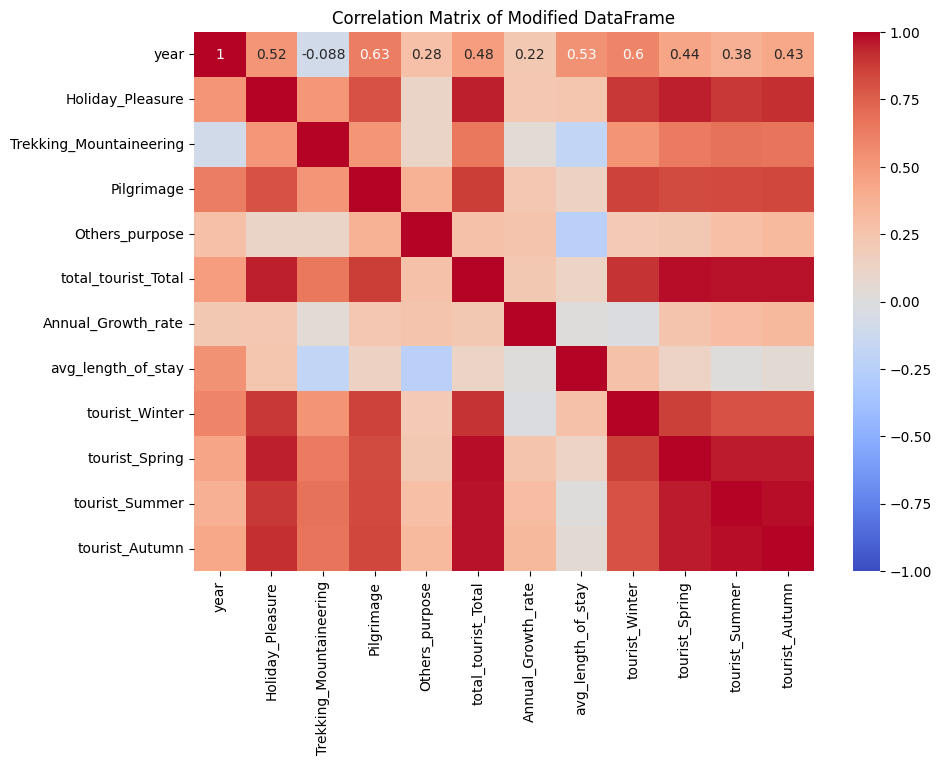

In [237]:
# Calculate the correlation matrix for the modified dataframe
corr_matrix = modified_df.corr()

# Plot the correlation matrix with a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Modified DataFrame')
plt.show()

Some important variables are still highly correlated so we will be performing PCA

   year  Holiday_Pleasure  Trekking_Mountaineering  Pilgrimage  Others_purpose  total_tourist_Total  Annual_Growth_rate  avg_length_of_stay   PC1   PC2  PC3   PC4
0  1995         183207.00                 84787.00     5257.00        42953.00               363395                  11                  11 -1.42 -0.28 0.08  0.11
1  1996         209377.00                 88945.00     4802.00        39165.00               393613                   8                  14 -1.20 -0.09 0.11  0.09
2  1997         249360.00                 91525.00     4068.00        19565.00               421857                   7                  10 -0.99 -0.20 0.07  0.11
3  1998         261347.00                112644.00    16164.00        21271.00               463684                  10                  11 -0.67 -0.21 0.05 -0.01
4  1999         290862.00                107960.00    19198.00        19574.00               491504                   6                  12 -0.47 -0.24 0.12 -0.05


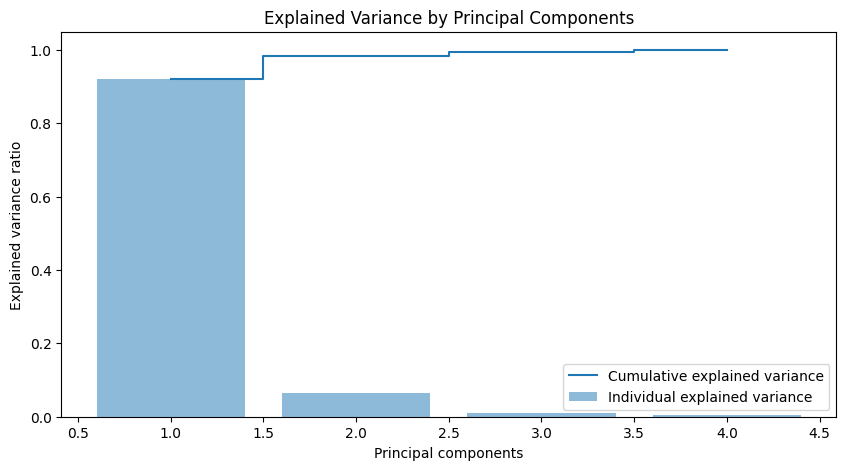

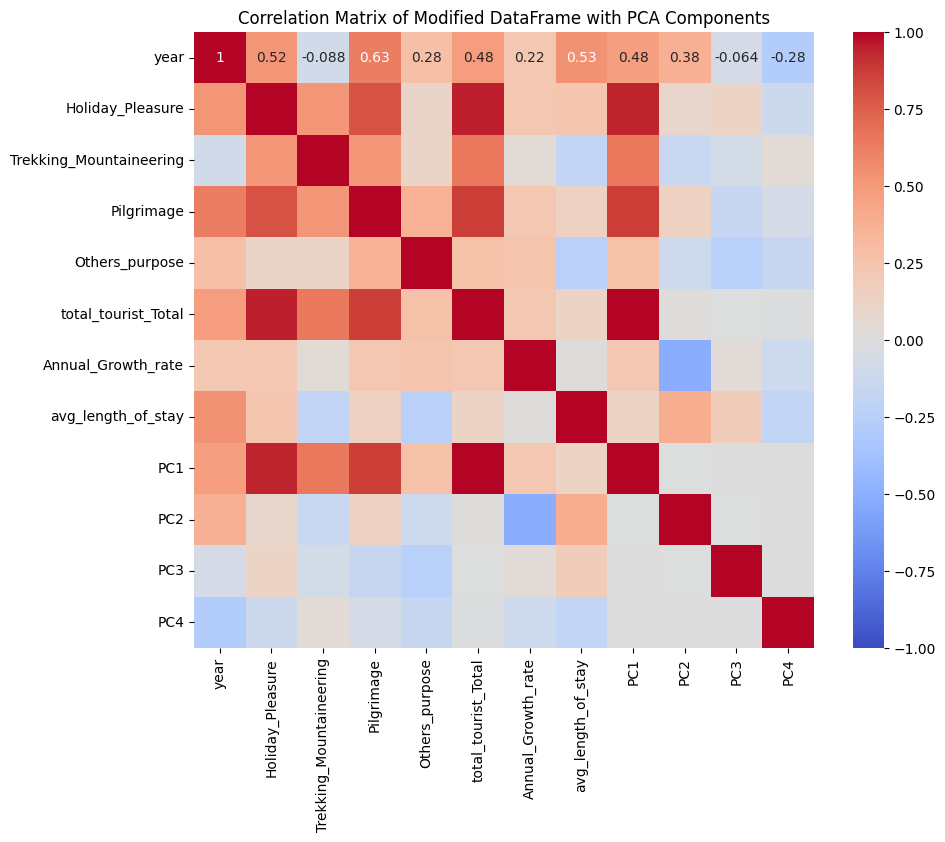

In [238]:

# Define the seasonal columns
seasonal_columns = ['tourist_Winter', 'tourist_Spring', 'tourist_Summer', 'tourist_Autumn']

# Standardize the seasonal data
scaler = StandardScaler()
seasonal_data_scaled = scaler.fit_transform(modified_df[seasonal_columns])

# Apply PCA
pca = PCA(n_components=len(seasonal_columns))  # Number of components equals the number of seasonal columns
seasonal_pca = pca.fit_transform(seasonal_data_scaled)

# Create a dataframe with PCA components
pca_columns = [f'PC{i+1}' for i in range(len(seasonal_columns))]
pca_df = pd.DataFrame(seasonal_pca, columns=pca_columns)

# Concatenate the PCA components with the original dataframe (excluding original seasonal columns)
modified_df_pca = pd.concat([modified_df.drop(columns=seasonal_columns), pca_df], axis=1)

# Check the resulting dataframe
print(modified_df_pca.head())

# Visualize the explained variance by each principal component
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()

# Calculate the correlation matrix for the modified dataframe
corr_matrix = modified_df_pca.corr()

# Plot the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Modified DataFrame with PCA Components')
plt.show()




comments on EDA

In [240]:
# Assuming df is your original DataFrame
X = modified_df_pca[['year', 'Holiday_Pleasure', 'Trekking_Mountaineering', 'Pilgrimage', 'Others_purpose', 'avg_length_of_stay', 'PC1', 'PC2', 'PC3', 'PC4']]
y = modified_df_pca['total_tourist_Total']

In [250]:
# Split the data into training + validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training + validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

# Normalize the data based on the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define the models you want to compare
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

# Initialize a dictionary to store the results
results = {}

# Perform cross-validation for each model and evaluate on the validation set
for name, model in models.items():
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    train_rmse_scores = []
    train_r2_scores = []
    val_rmse_scores = []
    val_r2_scores = []

    for train_index, val_index in kf.split(X_train_scaled):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Train the model on the training fold
        model.fit(X_train_fold, y_train_fold)

        # Predict on the training fold
        y_train_pred = model.predict(X_train_fold)
        # Predict on the validation fold
        y_val_pred = model.predict(X_val_fold)

        # Calculate RMSE and R2 scores for training data
        train_rmse = np.sqrt(mean_squared_error(y_train_fold, y_train_pred))
        train_r2 = model.score(X_train_fold, y_train_fold)
        train_rmse_scores.append(train_rmse)
        train_r2_scores.append(train_r2)

        # Calculate RMSE and R2 scores for validation data
        val_rmse = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))
        val_r2 = model.score(X_val_fold, y_val_fold)
        val_rmse_scores.append(val_rmse)
        val_r2_scores.append(val_r2)

    # Store the average results for the current model across all folds
    results[name] = {
        'Average Train RMSE': np.mean(train_rmse_scores), 
        'Average Train R2': np.mean(train_r2_scores),
        'Average Validation RMSE': np.mean(val_rmse_scores), 
        'Average Validation R2': np.mean(val_r2_scores)
    }

# Print the results for each model
for name, metrics in results.items():
    print(f'{name}:')
    print(f'  Average Train RMSE = {metrics["Average Train RMSE"]:.4f}, Average Train R2 = {metrics["Average Train R2"]:.4f}')
    print(f'  Average Validation RMSE = {metrics["Average Validation RMSE"]:.4f}, Average Validation R2 = {metrics["Average Validation R2"]:.4f}\n')

# Evaluate the final models on the test set
final_results = {}

for name, model in models.items():
    # Train the model on the entire training + validation set
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test_scaled)

    # Calculate RMSE and R2 scores for the test data
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = model.score(X_test_scaled, y_test)

    # Store the results
    final_results[name] = {
        'Test RMSE': test_rmse, 
        'Test R2': test_r2
    }

# Print the final test results for each model
for name, metrics in final_results.items():
    print(f'{name} Test:')
    print(f'  Test RMSE = {metrics["Test RMSE"]:.4f}, Test R2 = {metrics["Test R2"]:.4f}\n')

Linear Regression:
  Average Train RMSE = 921.5578, Average Train R2 = 1.0000
  Average Validation RMSE = 10032.5935, Average Validation R2 = 0.9957

Decision Tree:
  Average Train RMSE = 0.0000, Average Train R2 = 1.0000
  Average Validation RMSE = 150075.4403, Average Validation R2 = -0.2419

Random Forest:
  Average Train RMSE = 63727.6937, Average Train R2 = 0.9256
  Average Validation RMSE = 131383.4810, Average Validation R2 = 0.5551

Gradient Boosting:
  Average Train RMSE = 7.3577, Average Train R2 = 1.0000
  Average Validation RMSE = 114333.8923, Average Validation R2 = 0.6741

SVR:
  Average Train RMSE = 239386.9720, Average Train R2 = -0.0491
  Average Validation RMSE = 226207.6008, Average Validation R2 = -0.4975

KNN:
  Average Train RMSE = 148904.9246, Average Train R2 = 0.5951
  Average Validation RMSE = 169370.4163, Average Validation R2 = 0.1458

Linear Regression Test:
  Test RMSE = 13181.6440, Test R2 = 0.9938

Decision Tree Test:
  Test RMSE = 29278.7929, Test R2 = 

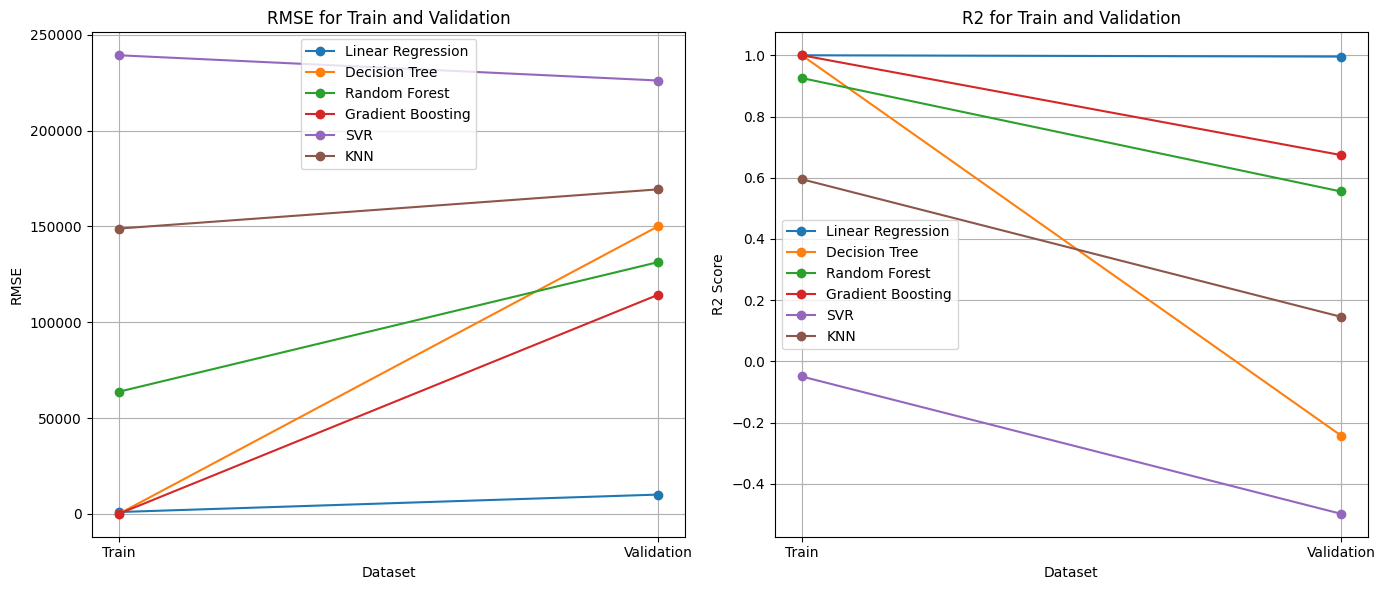

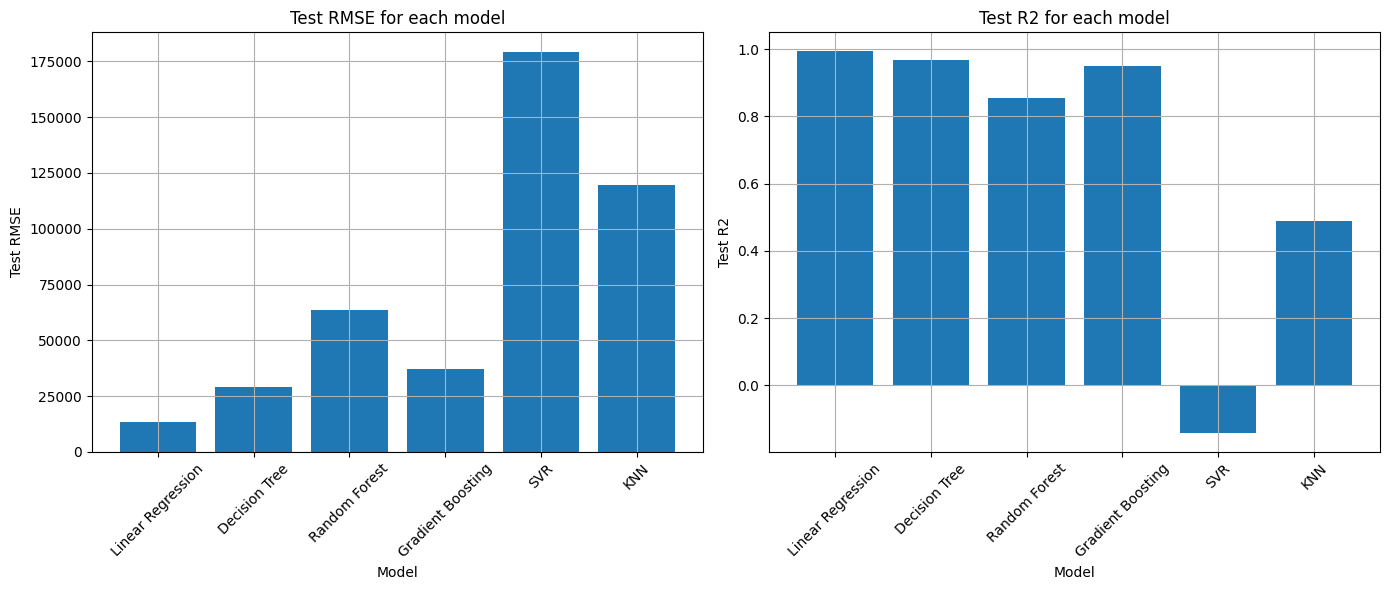

In [281]:
#Plotting these numbers

# Convert results to DataFrame
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})

# Plot RMSE for Train and Validation
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.title('RMSE for Train and Validation')
for model in results_df['Model']:
    plt.plot(['Train', 'Validation'], 
             [results[model]['Average Train RMSE'], results[model]['Average Validation RMSE']], 
             marker='o', label=model)
plt.xlabel('Dataset')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)

# Plot R2 for Train and Validation
plt.subplot(1, 2, 2)
plt.title('R2 for Train and Validation')
for model in results_df['Model']:
    plt.plot(['Train', 'Validation'], 
             [results[model]['Average Train R2'], results[model]['Average Validation R2']], 
             marker='o', label=model)
plt.xlabel('Dataset')
plt.ylabel('R2 Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Convert final_results to DataFrame
final_results_df = pd.DataFrame(final_results).T.reset_index().rename(columns={'index': 'Model'})

# Plot Test RMSE and R2
plt.figure(figsize=(14, 6))

# Plot Test RMSE
plt.subplot(1, 2, 1)
plt.title('Test RMSE for each model')
plt.bar(final_results_df['Model'], final_results_df['Test RMSE'])
plt.xlabel('Model')
plt.ylabel('Test RMSE')
plt.xticks(rotation=45)
plt.grid(True)

# Plot Test R2
plt.subplot(1, 2, 2)
plt.title('Test R2 for each model')
plt.bar(final_results_df['Model'], final_results_df['Test R2'])
plt.xlabel('Model')
plt.ylabel('Test R2')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


In [255]:
# Relative error calculation for linear regression

# Assuming y_train, y_val, and y_test contain the actual values
y_all = np.concatenate([y_train, y_val, y_test])

mean_target = np.mean(y_all)
median_target = np.median(y_all)

train_rmse = 921.5578
val_rmse = 10032.5935
test_rmse = 13181.6440

mean_percentage_error_train = (train_rmse / mean_target) * 100
mean_percentage_error_val = (val_rmse / mean_target) * 100
mean_percentage_error_test = (test_rmse / mean_target) * 100

median_percentage_error_train = (train_rmse / median_target) * 100
median_percentage_error_val = (val_rmse / median_target) * 100
median_percentage_error_test = (test_rmse / median_target) * 100

print(f'Train RMSE as a percentage of mean: {mean_percentage_error_train:.2f}%')
print(f'Validation RMSE as a percentage of mean: {mean_percentage_error_val:.2f}%')
print(f'Test RMSE as a percentage of mean: {mean_percentage_error_test:.2f}%')

print(f'Train RMSE as a percentage of median: {median_percentage_error_train:.2f}%')
print(f'Validation RMSE as a percentage of median: {median_percentage_error_val:.2f}%')
print(f'Test RMSE as a percentage of median: {median_percentage_error_test:.2f}%')


Train RMSE as a percentage of mean: 0.17%
Validation RMSE as a percentage of mean: 1.80%
Test RMSE as a percentage of mean: 2.37%
Train RMSE as a percentage of median: 0.19%
Validation RMSE as a percentage of median: 2.02%
Test RMSE as a percentage of median: 2.66%


Model Tuning for Linear Regression

In [256]:


# Define the parameter grid for Ridge
ridge_param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

# Define the parameter grid for Lasso
lasso_param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

# Define the parameter grid for Elastic Net
elasticnet_param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Initialize the Ridge, Lasso, and ElasticNet models
ridge = Ridge(random_state=42)
lasso = Lasso(random_state=42)
elasticnet = ElasticNet(random_state=42)

# Initialize GridSearchCV for Ridge
ridge_grid_search = GridSearchCV(estimator=ridge, param_grid=ridge_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
ridge_grid_search.fit(X_train_scaled, y_train)

# Initialize GridSearchCV for Lasso
lasso_grid_search = GridSearchCV(estimator=lasso, param_grid=lasso_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
lasso_grid_search.fit(X_train_scaled, y_train)

# Initialize GridSearchCV for ElasticNet
elasticnet_grid_search = GridSearchCV(estimator=elasticnet, param_grid=elasticnet_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
elasticnet_grid_search.fit(X_train_scaled, y_train)

# Best parameters and models
print("Best Ridge parameters: ", ridge_grid_search.best_params_)
print("Best Lasso parameters: ", lasso_grid_search.best_params_)
print("Best ElasticNet parameters: ", elasticnet_grid_search.best_params_)

best_ridge = ridge_grid_search.best_estimator_
best_lasso = lasso_grid_search.best_estimator_
best_elasticnet = elasticnet_grid_search.best_estimator_

# Evaluate the best models on the validation set
y_val_pred_ridge = best_ridge.predict(X_val_scaled)
val_rmse_ridge = np.sqrt(mean_squared_error(y_val, y_val_pred_ridge))
val_r2_ridge = best_ridge.score(X_val_scaled, y_val)

y_val_pred_lasso = best_lasso.predict(X_val_scaled)
val_rmse_lasso = np.sqrt(mean_squared_error(y_val, y_val_pred_lasso))
val_r2_lasso = best_lasso.score(X_val_scaled, y_val)

y_val_pred_elasticnet = best_elasticnet.predict(X_val_scaled)
val_rmse_elasticnet = np.sqrt(mean_squared_error(y_val, y_val_pred_elasticnet))
val_r2_elasticnet = best_elasticnet.score(X_val_scaled, y_val)

print(f'Ridge Validation RMSE = {val_rmse_ridge:.4f}, Validation R2 = {val_r2_ridge:.4f}')
print(f'Lasso Validation RMSE = {val_rmse_lasso:.4f}, Validation R2 = {val_r2_lasso:.4f}')
print(f'ElasticNet Validation RMSE = {val_rmse_elasticnet:.4f}, Validation R2 = {val_r2_elasticnet:.4f}')

# Evaluate the best models on the test set
y_test_pred_ridge = best_ridge.predict(X_test_scaled)
test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
test_r2_ridge = best_ridge.score(X_test_scaled, y_test)

y_test_pred_lasso = best_lasso.predict(X_test_scaled)
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
test_r2_lasso = best_lasso.score(X_test_scaled, y_test)

y_test_pred_elasticnet = best_elasticnet.predict(X_test_scaled)
test_rmse_elasticnet = np.sqrt(mean_squared_error(y_test, y_test_pred_elasticnet))
test_r2_elasticnet = best_elasticnet.score(X_test_scaled, y_test)

print(f'Ridge Test RMSE = {test_rmse_ridge:.4f}, Test R2 = {test_r2_ridge:.4f}')
print(f'Lasso Test RMSE = {test_rmse_lasso:.4f}, Test R2 = {test_r2_lasso:.4f}')
print(f'ElasticNet Test RMSE = {test_rmse_elasticnet:.4f}, Test R2 = {test_r2_elasticnet:.4f}')


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s[CV] END ..........................................alpha=1.0; total time=   0.0s

[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END ........................................

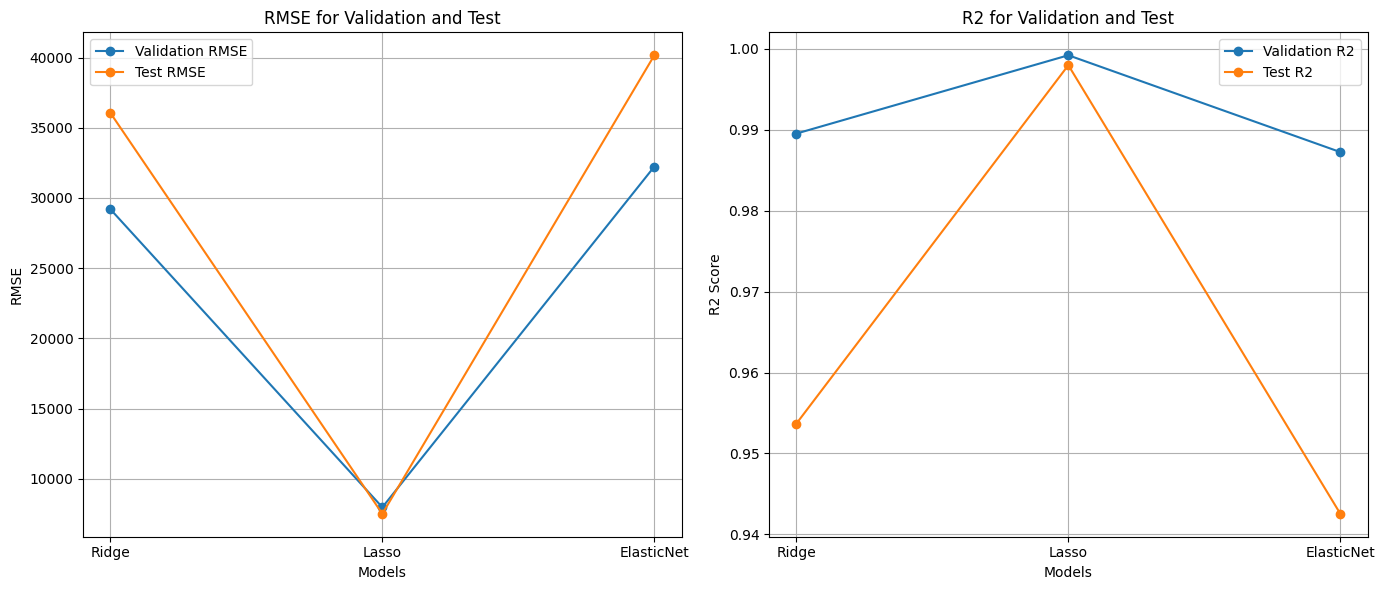

In [283]:
# Visualization
models = ['Ridge', 'Lasso', 'ElasticNet']
val_rmse = [val_rmse_ridge, val_rmse_lasso, val_rmse_elasticnet]
test_rmse = [test_rmse_ridge, test_rmse_lasso, test_rmse_elasticnet]
val_r2 = [val_r2_ridge, val_r2_lasso, val_r2_elasticnet]
test_r2 = [test_r2_ridge, test_r2_lasso, test_r2_elasticnet]

# Create a DataFrame for easy plotting
results_df = pd.DataFrame({
    'Model': models,
    'Validation RMSE': val_rmse,
    'Test RMSE': test_rmse,
    'Validation R2': val_r2,
    'Test R2': test_r2
})

# Plot RMSE for Validation and Test
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(results_df['Model'], results_df['Validation RMSE'], marker='o', label='Validation RMSE')
plt.plot(results_df['Model'], results_df['Test RMSE'], marker='o', label='Test RMSE')
plt.title('RMSE for Validation and Test')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)

# Plot R2 for Validation and Test
plt.subplot(1, 2, 2)
plt.plot(results_df['Model'], results_df['Validation R2'], marker='o', label='Validation R2')
plt.plot(results_df['Model'], results_df['Test R2'], marker='o', label='Test R2')
plt.title('R2 for Validation and Test')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [267]:
# Fine grained-tuning to further exploring an appropriate value for alpha
# Define the parameter grid for fine-grained tuning of Lasso
fine_lasso_param_grid = {
    'alpha': [50, 75, 100, 125, 150, 175, 200, 300, 400, 500, 600, 700, 800]
}

# Initialize GridSearchCV for Lasso with fine-grained parameter grid
fine_lasso_grid_search = GridSearchCV(estimator=Lasso(random_state=42), param_grid=fine_lasso_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
fine_lasso_grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
print("Best Lasso parameters after fine-tuning: ", fine_lasso_grid_search.best_params_)
best_fine_lasso = fine_lasso_grid_search.best_estimator_

# Evaluate the fine-tuned Lasso model on the validation set
y_val_pred_fine_lasso = best_fine_lasso.predict(X_val_scaled)
val_rmse_fine_lasso = np.sqrt(mean_squared_error(y_val, y_val_pred_fine_lasso))
val_r2_fine_lasso = best_fine_lasso.score(X_val_scaled, y_val)

print(f'Fine-tuned Lasso Validation RMSE = {val_rmse_fine_lasso:.4f}, Validation R2 = {val_r2_fine_lasso:.4f}')

# Evaluate the fine-tuned Lasso model on the test set
y_test_pred_fine_lasso = best_fine_lasso.predict(X_test_scaled)
test_rmse_fine_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_fine_lasso))
test_r2_fine_lasso = best_fine_lasso.score(X_test_scaled, y_test)

print(f'Fine-tuned Lasso Test RMSE = {test_rmse_fine_lasso:.4f}, Test R2 = {test_r2_fine_lasso:.4f}')


Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV] END ...........................................alpha=50; total time=   0.0s
[CV] END ...........................................alpha=50; total time=   0.0s
[CV] END ...........................................alpha=50; total time=   0.0s
[CV] END ...........................................alpha=50; total time=   0.0s
[CV] END ...........................................alpha=50; total time=   0.0s
[CV] END ...........................................alpha=75; total time=   0.0s
[CV] END ...........................................alpha=75; total time=   0.0s
[CV] END ...........................................alpha=75; total time=   0.0s
[CV] END ...........................................alpha=75; total time=   0.0s
[CV] END ...........................................alpha=75; total time=   0.0s
[CV] END ..........................................alpha=100; total time=   0.0s
[CV] END .......................................

In [271]:
# Extract the coefficients (feature importance) from the fine-tuned Lasso model
feature_importance = best_fine_lasso.coef_
features = X.columns

# Print feature importance
for feature, importance in zip(features, feature_importance):
    print(f'{feature}: {importance}')

# Optional: Create a DataFrame for better visualization and further analysis
import pandas as pd

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Sort by absolute value of importance
feature_importance_df['Absolute_Importance'] = feature_importance_df['Importance'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Absolute_Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)



year: 0.0
Holiday_Pleasure: 3678.673987500845
Trekking_Mountaineering: 0.0
Pilgrimage: 0.0
Others_purpose: 2808.934586765352
avg_length_of_stay: 580.4841864226823
PC1: 231275.4315531909
PC2: -0.0
PC3: -0.0
PC4: -2441.2582529307356
                   Feature  Importance  Absolute_Importance
6                      PC1   231275.43            231275.43
1         Holiday_Pleasure     3678.67              3678.67
4           Others_purpose     2808.93              2808.93
9                      PC4    -2441.26              2441.26
5       avg_length_of_stay      580.48               580.48
0                     year        0.00                 0.00
2  Trekking_Mountaineering        0.00                 0.00
3               Pilgrimage        0.00                 0.00
7                      PC2       -0.00                 0.00
8                      PC3       -0.00                 0.00


In [273]:
# Evaluate the final model on the training set
y_train_pred_fine_lasso = best_fine_lasso.predict(X_train_scaled)
train_rmse_fine_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_fine_lasso))
train_r2_fine_lasso = best_fine_lasso.score(X_train_scaled, y_train)

# Print the performance on the training set
print(f'Fine-tuned Lasso Train RMSE = {train_rmse_fine_lasso:.4f}, Train R2 = {train_r2_fine_lasso:.4f}')

# For completeness, also print validation and test performance
print(f'Fine-tuned Lasso Validation RMSE = {val_rmse_fine_lasso:.4f}, Validation R2 = {val_r2_fine_lasso:.4f}')
print(f'Fine-tuned Lasso Test RMSE = {test_rmse_fine_lasso:.4f}, Test R2 = {test_r2_fine_lasso:.4f}')



Fine-tuned Lasso Train RMSE = 2414.3690, Train R2 = 0.9999
Fine-tuned Lasso Validation RMSE = 6960.0153, Validation R2 = 0.9994
Fine-tuned Lasso Test RMSE = 4870.6513, Test R2 = 0.9992


In [275]:


# Make predictions using the fine-tuned Lasso model on the test set
y_test_pred = best_fine_lasso.predict(X_test_scaled)

# Create a DataFrame to compare actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

# Print the first few rows of the comparison
print(results_df.head())

# If you want to save the results to a CSV file for further analysis
results_df.to_csv('predictions_vs_actuals.csv', index=False)



    Actual  Predicted
9   385297  387835.61
25  230085  221600.66
8   338132  345499.12
21  753002  753498.04
0   363395  366394.20


In [277]:
# Checking the actual vs predicted data on the entire data set

# Combine the entire dataset (train + validation + test)
X_combined_scaled = np.concatenate((X_train_scaled, X_val_scaled, X_test_scaled), axis=0)
y_combined = np.concatenate((y_train, y_val, y_test), axis=0)

# Make predictions using the fine-tuned Lasso model on the entire dataset
y_combined_pred = best_fine_lasso.predict(X_combined_scaled)

# Create a DataFrame to compare actual and predicted values for the entire dataset
combined_results_df = pd.DataFrame({
    'Actual': y_combined,
    'Predicted': y_combined_pred
})

# Print the first few rows of the comparison
display(combined_results_df)

# If you want to save the results to a CSV file for further analysis
combined_results_df.to_csv('predictions_vs_actuals_entire_dataset.csv', index=False)



,Actual,Predicted
0,790118,794585.58
1,463684,465509.63
2,500277,498618.42
3,602867,598283.34
4,275468,276257.24
5,150962,153890.09
6,375398,378676.54
7,538970,536210.70
8,383926,383836.61
9,736215,736320.58
